<a href="https://colab.research.google.com/github/Fulviacon/Lasflores/blob/main/victorian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Leer el archivo CSV con una codificación diferente
archivo_csv = '/content/drive/MyDrive/Gungor_2018_VictorianAuthorAttribution_data-train.csv'
datos = pd.read_csv(archivo_csv, encoding='ISO-8859-1')

# Mostrar las primeras filas del DataFrame
print(datos.head())


                                                text  author
0  ou have time to listen i will give you the ent...       1
1  wish for solitude he was twenty years of age a...       1
2  and the skirt blew in perfect freedom about th...       1
3  of san and the rows of shops opposite impresse...       1
4  an hour s walk was as tiresome as three in a s...       1


In [ ]:
import pandas as pd

# Leer el archivo CSV con una codificación diferente
archivo_csv = '/content/drive/MyDrive/Gungor_2018_VictorianAuthorAttribution_data.csv'
datos = pd.read_csv(archivo_csv, encoding='ISO-8859-1')

# Mostrar las primeras filas del DataFrame
print(datos.head())

                                                text
0  nt it seems te me how much money is he worth a...
1  to talk about why you heard of such a case as ...
2  my foot on the ground and said i believe you d...
3  hour or wait for miss oh wait for by all means...
4  will not listen to such words now go and remem...


In [ ]:
# Instalar librerías necesarias (si no están instaladas)
!pip install nltk

# Importar librerías necesarias
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Definir stopwords y lematizador
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Definir la función de procesamiento de texto
def procesar_texto(text):
    tokens = word_tokenize(text)  # Tokenizar
    tokens = [word for word in tokens if word.lower() not in stop_words]  # Eliminar stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lematizar
    return tokens

# Leer el archivo CSV
archivo_csv = '/content/drive/MyDrive/Gungor_2018_VictorianAuthorAttribution_data-train.csv'
datos = pd.read_csv(archivo_csv, encoding='ISO-8859-1')  # Ajustar la codificación si es necesario

# Verificar nombres de columnas
print(datos.columns)

# Aplicar la función a la columna 'text'
datos['tokens'] = datos['text'].apply(procesar_texto)

# Mostrar las primeras filas del DataFrame con los tokens procesados
print(datos[['text', 'tokens']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['text', 'author'], dtype='object')
                                                text  \
0  ou have time to listen i will give you the ent...   
1  wish for solitude he was twenty years of age a...   
2  and the skirt blew in perfect freedom about th...   
3  of san and the rows of shops opposite impresse...   
4  an hour s walk was as tiresome as three in a s...   

                                              tokens  
0  [ou, time, listen, give, entire, story, said, ...  
1  [wish, solitude, twenty, year, age, possession...  
2  [skirt, blew, perfect, freedom, upper, part, w...  
3  [san, row, shop, opposite, impressed, upon, vi...  
4  [hour, walk, tiresome, three, sensible, englis...  


In [ ]:
!pip install nltk scikit-learn

import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Leer el archivo CSV
archivo_csv = '/content/drive/MyDrive/Gungor_2018_VictorianAuthorAttribution_data-train.csv'
datos = pd.read_csv(archivo_csv, encoding='ISO-8859-1')

# Verificar los nombres de las columnas
print(datos.columns)

# Suponiendo que la columna de texto se llama 'text'
textos = datos['text'].fillna('')  # Rellenar valores nulos si existen


Index(['text', 'author'], dtype='object')


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def procesar_texto(text):
    tokens = word_tokenize(text.lower())  # Convertir a minúsculas y tokenizar
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

# Aplicar la función de procesamiento de texto
textos_procesados = textos.apply(procesar_texto)


In [ ]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
X = vectorizer.fit_transform(textos_procesados)


In [ ]:
# Definir el número de clusters (k)
num_clusters = 5

# Aplicar K-means
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X)

# Asignar los clusters al DataFrame original
datos['cluster'] = km.labels_

# Mostrar las primeras filas con los clusters asignados
print(datos[['text', 'cluster']].head())


NameError: name 'KMeans' is not defined

In [ ]:
for i in range(num_clusters):
    print(f"Cluster {i}")
    print(datos[datos['cluster'] == i]['text'].head(10))  # Mostrar 10 ejemplos por cluster
    print("\n")


Cluster 0
21     do you tell me that a clergyman has consented ...
83     her part well as the end of the month approach...
84     i a look of comprehension filled the eyes of t...
85     out of had proved too strong for her now she d...
175    he thought he would stay where he was for the ...
185    inquiry he had already heard from people at th...
186    the library keys he asked finally i i think it...
233    the all eyes were now turned on whose face was...
251    was impressed by the captain into reading the ...
322    with one of the oldest and most distinguished ...
Name: text, dtype: object


Cluster 1
0      ou have time to listen i will give you the ent...
1      wish for solitude he was twenty years of age a...
2      and the skirt blew in perfect freedom about th...
242    came in the meantime he dismissed his and redu...
256    in the most picturesque of countries with very...
258    even to the captain as various passengers pass...
259    brought over arid after thanking 

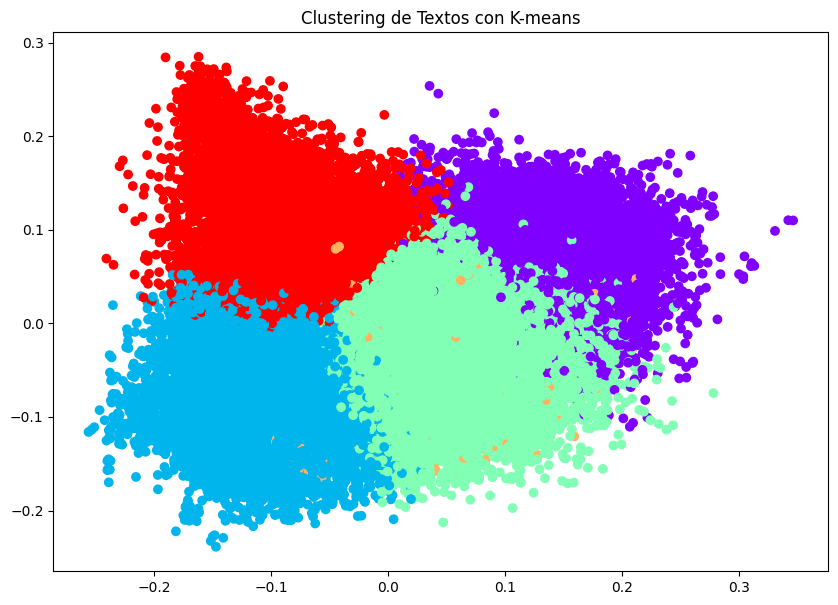

In [ ]:
from sklearn.decomposition import PCA

# Reducir las dimensiones a 2D para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, cmap='rainbow')
plt.title('Clustering de Textos con K-means')
plt.show()


Aplicar un algoritmo de clustering como K-means a un conjunto de datos textuales requiere varios pasos de preprocesamiento. A continuación te guiaré a través del proceso, desde la carga de datos hasta la aplicación de K-means para agrupar textos similares.